<a href="https://colab.research.google.com/github/zmitsek/BioStat_2022/blob/hw4-5/hw4-5/homework_lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [8]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# В переменную data_path надо положить путь до данных
data_path = "drive/MyDrive"
expression_data = pd.read_csv(f"{data_path}/homework_lecture_5_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [157]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'").select_dtypes(include='number')
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'").select_dtypes(include='number')

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [16]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

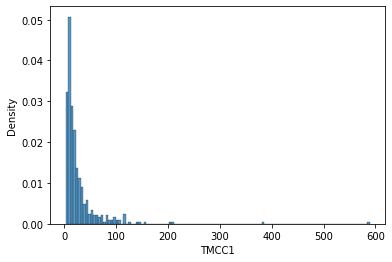

In [17]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

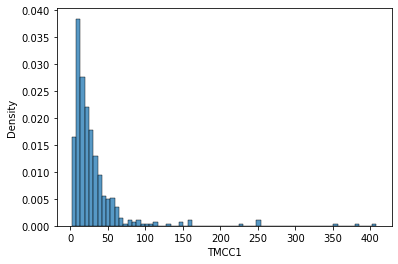

In [18]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [158]:
np.random.seed(8800)
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []
    for i in range(n_samples):
      sample = np.random.choice(expressions, size=sample_size)
      mean = np.mean(sample)
      mean_expressions.append(mean)

    return mean_expressions
    

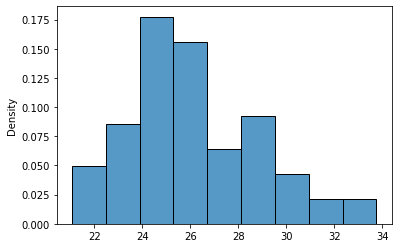

In [160]:
sns.histplot(demonstrate_clt(b_cells_expression_data["TMCC1"], 150, 100), stat="density");

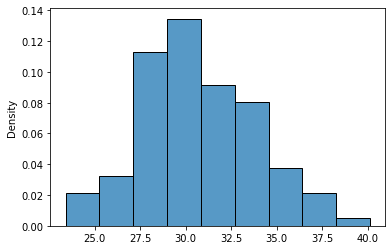

In [38]:
sns.histplot(demonstrate_clt(nk_cells_expression_data["TMCC1"], 170, 100), stat="density");

Видно невооруженным глазом, что средние экспрессии данного гена отличаются у клеток разных типов, ниже глаз вооружим

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [127]:
mean_b = np.mean(b_cells_expression_data["TMCC1"])
std_b = np.std(b_cells_expression_data["TMCC1"])
se_b = std_b / np.sqrt(b_cells_expression_data["TMCC1"].count())
left_b_b = mean_b - 1.96 * se_b
right_b_b = mean_b + 1.96 * se_b


mean_nk = np.mean(nk_cells_expression_data["TMCC1"])
std_nk = np.std(nk_cells_expression_data["TMCC1"])
se_nk = std_nk / np.sqrt(nk_cells_expression_data["TMCC1"].count())
left_b_nk = mean_nk - 1.96 * se_nk
right_b_nk = mean_nk + 1.96 * se_nk


print('95% доверительный интервал экспрессии TMCC1 в В-клетках:', left_b_b,right_b_b)
print('95% доверительный интервал экспрессии TMCC1 в NK-клетках:', left_b_nk,right_b_nk)

95% доверительный интервал экспрессии TMCC1 в В-клетках: 23.43239029314829 30.525553365251714
95% доверительный интервал экспрессии TMCC1 в NK-клетках: 26.85831319956931 34.00432600123069


Доверительные интервалы имеют немаленькое пересечение, что указывает на то, что статистически значимых различий нет


## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [56]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [128]:
# B клетки
ci_b_tmcc1 = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

In [129]:
# NK клетки
ci_nk_tmcc1 = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [ ]:

def check_intervals_intersect(first_ci, second_ci):
  if first_ci[1] < second_ci[0] or second_ci[1] < first_ci[0]:
    are_intersect = False
  else:
    are_intersect = True
  return are_intersect 


Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [84]:

def check_dge_with_ci(first_table, second_table):
  ci_test_results = []
  for i in range(first_table.shape[1]):
    ci_f = st.t.interval(alpha=0.95, 
              df=len(first_table.iloc[:,i]) - 1, 
              loc=np.mean(first_table.iloc[:,i]), 
              scale=st.sem(first_table.iloc[:,i])) 
    ci_sec = st.t.interval(alpha=0.95, 
              df=len(second_table.iloc[:,i]) - 1, 
              loc=np.mean(second_table.iloc[:,i]), 
              scale=st.sem(second_table.iloc[:,i]))
    if ci_f[1] < ci_sec[0] or ci_sec[1] < ci_f[0]:
      ci_test_results.append(True) # True - значит различия значимы, пересечений нет
    else:
      ci_test_results.append(False)
  return ci_test_results


In [ ]:
check_dge_with_ci(b_cells_expression_data.select_dtypes(include ='number'), nk_cells_expression_data.select_dtypes(include ='number'))

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [125]:
from statsmodels.stats.weightstats import ztest

In [126]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.3427434041885127, 0.17935507499860204)

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [167]:
def check_dge_with_ztest(first_table, second_table):
  z_test_results = []
  for i in range(first_table.shape[1]):    
    if ztest(first_table.iloc[:,i],second_table.iloc[:,i])[1] < 0.05:
      z_test_results.append(True) # True - значит различия значимы, p-value < 0.05
    else:
      z_test_results.append(False) 
  return z_test_results   


## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [ ]:
print('Введите путь до таблицы с данными, включая название этой таблицы с форматом() все данные в таблице должны быть одного(числового) типа!)')
first_table = pd.read_csv(f"{input()}", index_col=0)
print('А теперь путь до второй таблицы, требования те же ')
second_table = pd.read_csv(f"{input()}", index_col=0)
ci_test_results = []
z_test_results = []
z_test_p_values = []
mean_diff = []
for i in range(first_table.shape[1] ):       
  ci_f = st.t.interval(alpha=0.95,                           #считаем доверительные интервалы в 1 клеточном типе
                       df=len(first_table.iloc[:,i]) - 1,
                       loc=np.mean(first_table.iloc[:,i]),
                       scale=st.sem(first_table.iloc[:,i]))
  ci_sec = st.t.interval(alpha=0.95,                         # считаем доверительные интервалы во 2 клеточном типе
                        df=len(second_table.iloc[:,i]) - 1, 
                       loc=np.mean(second_table.iloc[:,i]), 
                       scale=st.sem(second_table.iloc[:,i]))
  if ci_f[1] < ci_sec[0] or ci_sec[1] < ci_f[0]:             # проверяем, пересекаются ли
    ci_test_results.append(True)      # True - значит различия значимы, пересечений нет
  else:
    ci_test_results.append(False)

  if ztest(first_table.iloc[:,i],second_table.iloc[:,i])[1] < 0.05:    
    z_test_results.append(True)                         # True - значит различия значимы, p-value < 0.05
  else:
    z_test_results.append(False)

  z_test_p_values.append(ztest(first_table.iloc[:,i],second_table.iloc[:,i])[1])    # записываем значение p-value

  mean_diff.append(np.mean(first_table.iloc[:,i]) - np.mean(second_table.iloc[:,i]))   # записываем разницу между средними экспрессиями


results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
print('Введите название файла с результатами')
results.to_csv(f"{input()}.csv") 


## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)